In [33]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [34]:
df = pd.read_csv('NFLX.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...,...
5039,2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000
5040,2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500
5041,2022-06-01,198.699997,202.740005,191.660004,192.910004,192.910004,8416200
5042,2022-06-02,192.020004,205.470001,191.720001,205.089996,205.089996,9623100


In [35]:
df = df[['Date', 'Close']]
df

,Date,Close
0,2002-05-23,1.196429
1,2002-05-24,1.210000
2,2002-05-28,1.157143
3,2002-05-29,1.103571
4,2002-05-30,1.071429
...,...,...
5039,2022-05-27,195.190002
5040,2022-05-31,197.440002
5041,2022-06-01,192.910004
5042,2022-06-02,205.089996


In [36]:
df['Date']

0       2002-05-23
1       2002-05-24
2       2002-05-28
3       2002-05-29
4       2002-05-30
           ...    
5039    2022-05-27
5040    2022-05-31
5041    2022-06-01
5042    2022-06-02
5043    2022-06-03
Name: Date, Length: 5044, dtype: object

In [37]:
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [38]:
df

,Date,Close
0,2002-05-23,1.196429
1,2002-05-24,1.210000
2,2002-05-28,1.157143
3,2002-05-29,1.103571
4,2002-05-30,1.071429
...,...,...
5039,2022-05-27,195.190002
5040,2022-05-31,197.440002
5041,2022-06-01,192.910004
5042,2022-06-02,205.089996


In [39]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

0      2002-05-23
1      2002-05-24
2      2002-05-28
3      2002-05-29
4      2002-05-30
          ...    
5039   2022-05-27
5040   2022-05-31
5041   2022-06-01
5042   2022-06-02
5043   2022-06-03
Name: Date, Length: 5044, dtype: datetime64[ns]

In [40]:
df.index = df.pop('Date')
df

,Close
Date,
2002-05-23,1.196429
2002-05-24,1.210000
2002-05-28,1.157143
2002-05-29,1.103571
2002-05-30,1.071429
...,...
2022-05-27,195.190002
2022-05-31,197.440002
2022-06-01,192.910004


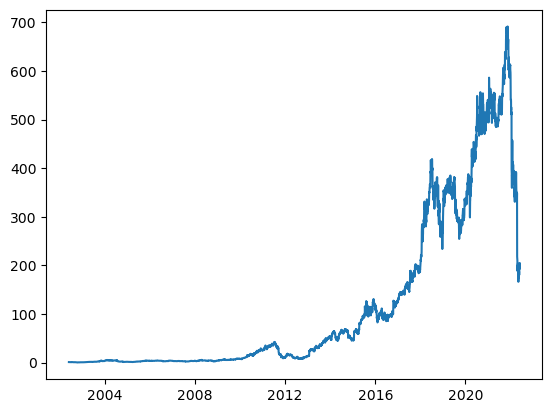

In [41]:
plt.plot(df.index, df['Close'])
plt.show()

In [42]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2022-03-23',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,523.109985,535.090027,520.809998,502.859985
1,2021-03-26,535.090027,520.809998,502.859985,508.049988
2,2021-03-29,520.809998,502.859985,508.049988,513.950012
3,2021-03-30,502.859985,508.049988,513.950012,513.390015
4,2021-03-31,508.049988,513.950012,513.390015,521.659973
...,...,...,...,...,...
247,2022-03-17,331.010010,343.750000,357.529999,371.399994
248,2022-03-18,343.750000,357.529999,371.399994,380.600006
249,2022-03-21,357.529999,371.399994,380.600006,374.589996
250,2022-03-22,371.399994,380.600006,374.589996,382.920013


In [43]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

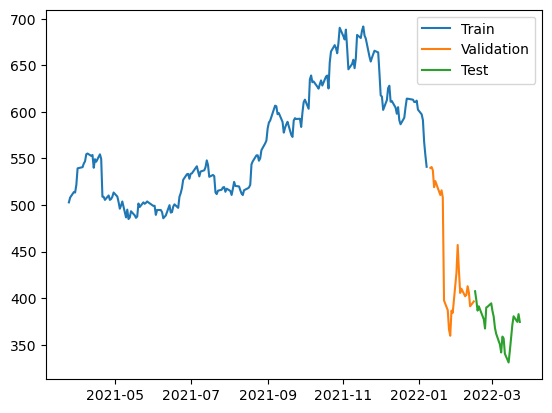

In [44]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])
plt.show()

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=150)

Epoch 1/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 163ms/step - loss: 322872.5000 - mean_absolute_error: 565.2537 - val_loss: 197192.6250 - val_mean_absolute_error: 439.8756
Epoch 2/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 317080.5938 - mean_absolute_error: 560.2247 - val_loss: 196734.1250 - val_mean_absolute_error: 439.3540
Epoch 3/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 322441.1562 - mean_absolute_error: 564.5433 - val_loss: 196153.5625 - val_mean_absolute_error: 438.6918
Epoch 4/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 321098.5000 - mean_absolute_error: 564.4290 - val_loss: 195292.4062 - val_mean_absolute_error: 437.7082
Epoch 5/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 317305.9375 - mean_absolute_error: 560.3383 - val_loss: 194334.5625 - val_mean_absolute_error: 436.6149
Epoch 6/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 318899.2188 - mean_absolute_error: 561.6285 - val_loss: 193276.9219 - val_mean_absolute_error: 435.4011
Epoch 7/150
7/7 ━━━━━━━━━━━

Epoch 43/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 8855.7168 - mean_absolute_error: 73.4050 - val_loss: 7828.6738 - val_mean_absolute_error: 76.7856
Epoch 44/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 6817.5044 - mean_absolute_error: 61.6771 - val_loss: 9547.7197 - val_mean_absolute_error: 82.5506
Epoch 45/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 6054.1221 - mean_absolute_error: 59.1678 - val_loss: 11285.2676 - val_mean_absolute_error: 89.8069
Epoch 46/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4452.9824 - mean_absolute_error: 51.0601 - val_loss: 12862.9473 - val_mean_absolute_error: 96.3662
Epoch 47/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3944.1238 - mean_absolute_error: 49.8290 - val_loss: 14290.3096 - val_mean_absolute_error: 102.9007
Epoch 48/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 4149.8223 - mean_absolute_error: 52.3184 - val_loss: 15542.6279 - val_mean_absolute_error: 108.8158
Epoch 49/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step -

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3307.2126 - mean_absolute_error: 49.7809 - val_loss: 19943.4531 - val_mean_absolute_error: 127.5365
Epoch 86/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3595.7915 - mean_absolute_error: 53.5320 - val_loss: 19883.6641 - val_mean_absolute_error: 127.3138
Epoch 87/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3634.0623 - mean_absolute_error: 53.7348 - val_loss: 19885.8145 - val_mean_absolute_error: 127.3030
Epoch 88/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3634.7734 - mean_absolute_error: 53.5069 - val_loss: 19932.6035 - val_mean_absolute_error: 127.4415
Epoch 89/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3731.6191 - mean_absolute_error: 53.9933 - val_loss: 19302.1133 - val_mean_absolute_error: 125.0531
Epoch 90/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3374.8269 - mean_absolute_error: 51.3537 - val_loss: 19637.4219 - val_mean_absolute_error: 126.3316
Epoch 91/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1746.6718 - mean_absolute_error: 32.8601 - val_loss: 9413.3252 - val_mean_absolute_error: 88.8692
Epoch 128/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1609.8298 - mean_absolute_error: 34.4030 - val_loss: 8933.3857 - val_mean_absolute_error: 86.2133
Epoch 129/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1458.7526 - mean_absolute_error: 33.0119 - val_loss: 6305.9121 - val_mean_absolute_error: 66.8484
Epoch 130/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1446.4354 - mean_absolute_error: 31.1022 - val_loss: 6857.6138 - val_mean_absolute_error: 71.4553
Epoch 131/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1254.4384 - mean_absolute_error: 29.0658 - val_loss: 7979.5542 - val_mean_absolute_error: 80.4238
Epoch 132/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1232.1372 - mean_absolute_error: 29.0806 - val_loss: 7724.6963 - val_mean_absolute_error: 78.8562
Epoch 133/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1268.3

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step


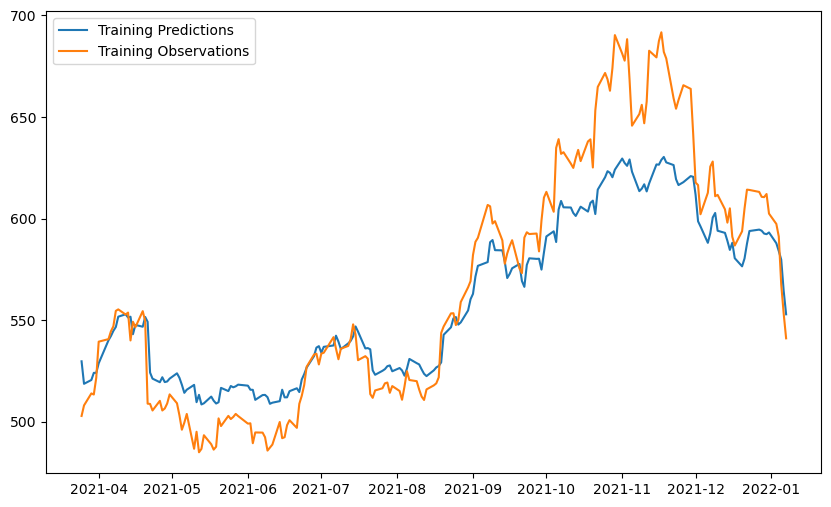

In [46]:
train_predictions = model.predict(X_train).flatten()

plt.figure(figsize=(10,6))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


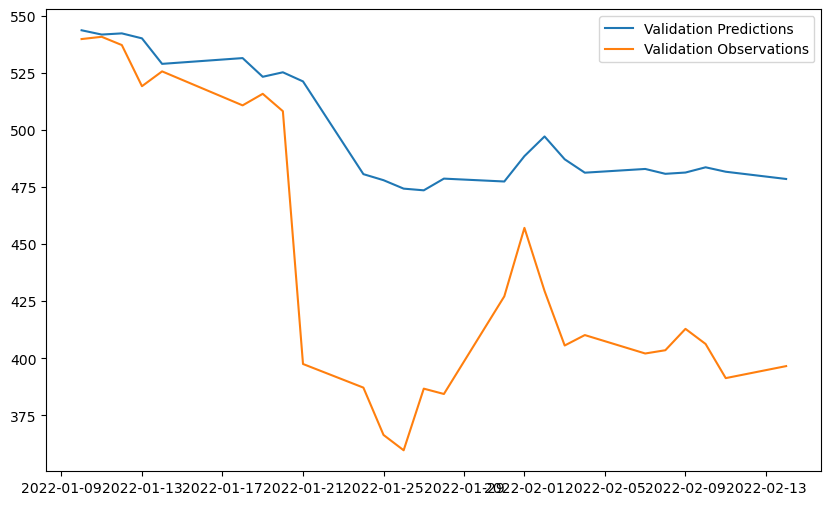

In [47]:
val_predictions = model.predict(X_val).flatten()

plt.figure(figsize=(10,6))
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


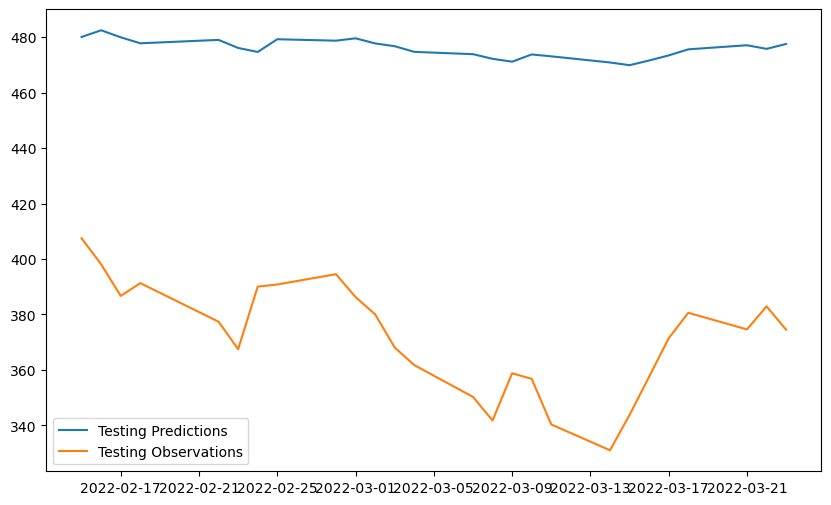

In [48]:
test_predictions = model.predict(X_test).flatten()

plt.figure(figsize=(10,6))
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show()

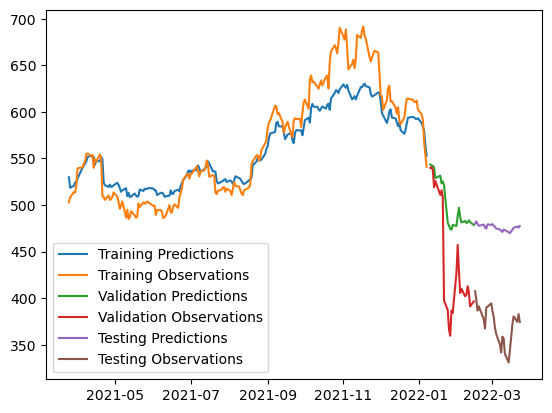

In [49]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])
plt.show()

In [50]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━

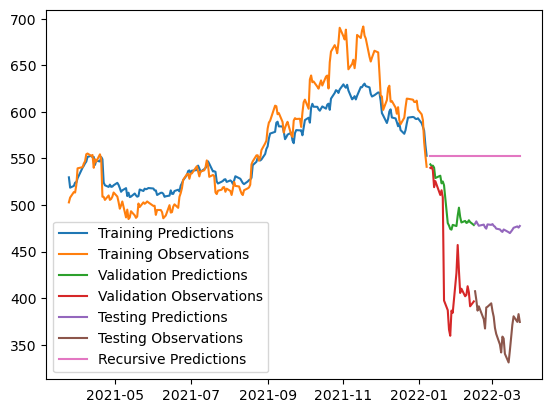

In [51]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])
plt.show()